<center> <font size="+1"> TP1 SIC 4102 </font> </center>

# Moindres carrés (cas sur-déterminé), sensibilité au bruit

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def approx_l2(A, b):
    """ x = approx_l2(A, b)

    Returns the solution of:
        min. ||b-Ax||_2^2
        (wrt x)
    """
    lm = A.transpose().dot(A)
    Atb = A.transpose().dot(b)
    x = np.linalg.solve(lm, Atb)
    return x

In [3]:
def bad_cond_matrix(matSize, condNumb):
    """ A = bad_cond_matrix(matSize, condNumb)

    Returns a matrix of size matSize with condition number condNumb.
    Designed for educational purposes to test badly conditionned matrices.
    
    Parameters
    ----------
    matSize : tuple (int, int)
        matrix shape
    condNumb : float 
        condition number
        
    Returns
    -------
    array : matrix with given condition number
    """
    m, n = matSize
    A = np.random.randn(m, n)
    u, s, v = np.linalg.svd(A, full_matrices=False)
    newsmin = s.max()/condNumb
    news = (s - s.max()) / (s.max() - s.min())*(s.max() - newsmin) + s.max()
    A = u.dot(np.diag(news)).dot(v)
    return A

$
\newcommand{\bA}{\mathbf{A}}
\newcommand{\bx}{\mathbf{x}}
\newcommand{\by}{\mathbf{y}}
\newcommand{\be}{\mathbf{e}}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\Argmin}{\mathrm{Argmin}}
\newcommand{\st}{\mathrm{s.t.}}
$

On considère le modèle d'observation suivant:
$$
\by = \bA\bx_0 + \be
$$
où $\bA\in\RR^{m\times n}$ est une matrice donnée, $\by$ est le vecteur d'observation (taille $m$), $\bx_0$ est le vecteur des vraies données à reconstituer et $\be$ est un terme de bruit perturbateur.

On suppose $m\geq n$, c'est-à-dire plus d'observations que d'inconnues.

## Génération d'un signal original $\bx_0$
Choisir $n$ de l'ordre de 500.
Générer pour $\bx_0$ des échantillons d'un signal sinusoidal avec une dizaine de périodes.

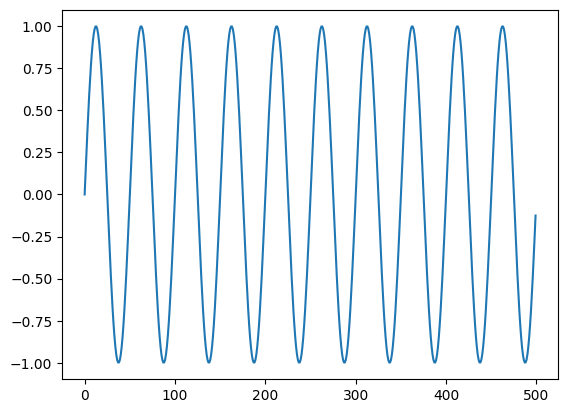

In [4]:
n = 500
x0 = np.sin(2*np.pi*np.arange(n)/n*10)
Fig_x0, Ax_x0 = plt.subplots(1, 1)
Ax_x0.plot(x0)

## Génération d'observations

Générer une matrice $m\times n$. On testera successivement:
- une matrice tirée aléatoirement (coefficients selon une loi continue)
- une matrice mal conditionnée (utiliser la fonction `bad_cond_matrix` avec un nombre de conditionnement grand~1e8).

Générer des observations non bruitées $\by_0=\bA\bx_0$ et des observations bruitées $\by=\bA\bx_0+\be$, avec un rapport signal/bruit de 20dB (c'est un très faible niveau de bruit: faire un éventuel tracé pour s'en convaincre).

Text(0.5, 1.0, 'Observations with noise')

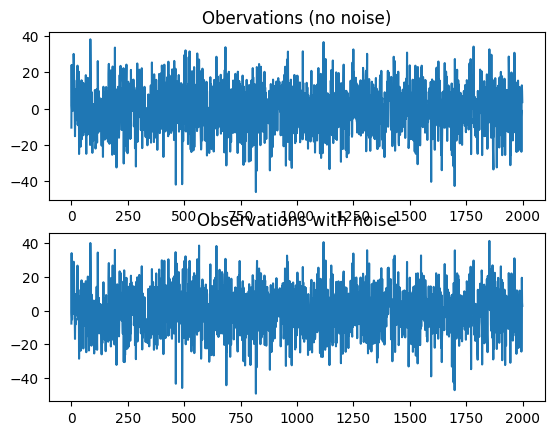

In [5]:
m = 2000
# ### choix 1: matrice tirée aléatoirement
# A = np.random.randn(m,n)
# ### choix 2: matrice mal conditionnée
condNum = 1e8
A = bad_cond_matrix((m,n),condNum)

# ### xtrue et observation non bruitee
y0 = A@x0
# ### ajout de bruit sur les observations
Py = (y0**2).sum()/m
snr_dB = +20 # rapport signal/bruit en dB
sigma_e = np.sqrt(Py*np.exp(-snr_dB/10))
e = sigma_e*np.random.randn(m)
yn = y0 + e
# ### tracé des observations
Fig_Observ, Ax_Observ = plt.subplots(2, 1)
Ax_Observ[0].plot(y0)
Ax_Observ[0].set_title('Obervations (no noise)')
Ax_Observ[1].plot(yn)
Ax_Observ[1].set_title('Observations with noise')

## Reconstruction par moindres carrés

On définit
$$
\hat{\bx}_{\ell_2} = \Argmin_\bx  \|\by-\bA\bx\|_2
$$

Regarder ce que donne $\hat{\bx}_{\ell_2}$ dans le cas avec et sans bruit; illustrer que, avec ce faible bruit, c'est une très mauvaise reconstruction de $\bx_0$. On ré-écrira la fonction `approx_l2(A, y)` correspondante.

No noise 	 norm(x0 - xl20): 3.42  	 1/n*norm()^2: 0.0234
With noise 	 norm(x0 - xl2): 2.57e+06 	 1/n*norm()^2: 1.32e+10


Text(0.5, 1.0, 'xhatn')

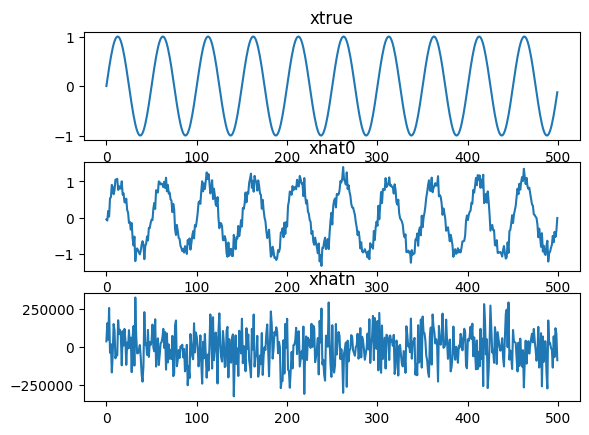

In [6]:
xhat0 = approx_l2(A, y0)
xhatn = approx_l2(A, yn)

print('No noise \t norm(x0 - xl20): {0:2.3g}  \t 1/n*norm()^2: {1:.3g}'\
      .format(np.linalg.norm(x0-xhat0),1/n*np.linalg.norm(x0-xhat0)**2))
print('With noise \t norm(x0 - xl2): {0:2.3g} \t 1/n*norm()^2: {1:.3g}'\
      .format(np.linalg.norm(x0-xhatn),1/n*np.linalg.norm(x0-xhatn)**2))

Fig_xhat, Ax_xhat = plt.subplots(3, 1)
Ax_xhat[0].plot(x0)
Ax_xhat[0].set_title('xtrue')
Ax_xhat[1].plot(xhat0)
Ax_xhat[1].set_title('xhat0')
Ax_xhat[2].plot(xhatn)
Ax_xhat[2].set_title('xhatn')